# Data Science with Python
by Ladislav Vrbsky  
for Estácio

<a href='https://portal.estacio.br/'> <img src='https://portal.estacio.br/imgs/logo-estacio.png' /></a>

# Intro to Machine Learning with scikit-learn

In [1]:
import pandas as pd
import math

from sklearn import __version__ as sklearn_version
print(f'Scikit learn version: {sklearn_version} should be >= 0.23')
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support, classification_report
import seaborn as sns
%matplotlib inline

# If necessary, make some updates
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn

Scikit learn version: 0.23.1 should be >= 0.23


# Get and Explore Data

Data source: [kaggle - Zoo Animal Classification](https://www.kaggle.com/uciml/zoo-animal-classification) dataset By [UCI ML](https://archive.ics.uci.edu/ml/datasets.php).

In [2]:
df = pd.read_csv("data/zoo.csv")
df.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [4]:
df_class = pd.read_csv("data/class.csv")
df_class.head(10)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


## Choose a type of classification here
Multi-class or binary classification - you choose.

In [5]:
multi_class = True
my_class = 'Mammal'
df_model = df.copy()

In [6]:
if not multi_class:
    class_number = df_class[df_class['Class_Type']==my_class]['Class_Number'][0]
    print(f'Class number to identify: {class_number}')
    df_model['class_type'] = df_model['class_type'].apply(lambda x: 1 if x==class_number else 0)
    target_names = ['Other', my_class]
else:
    target_names = list(df_class['Class_Type'])

print(target_names)
df_model.head(30)

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


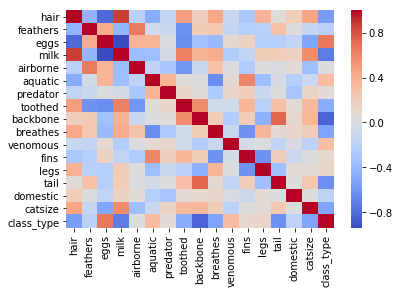

In [7]:
sns.heatmap(df_model.corr(), cmap='coolwarm')

# Model

<img src='./img/ML_flow2.png'>

Split data

In [8]:
X = df_model.iloc[:, 1:-1]
y = df_model.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


Define the model or classifier. Choosing here the [C-Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from algorithm module Support Vector Machines.

In [9]:
model = svm.SVC()

Train on train data

In [10]:
model.fit(X_train, y_train) 

SVC()

## Evaluate

In [11]:
model.score(X_test, y_test)

0.9230769230769231

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred[15:25]

array([6, 7, 4, 2, 1, 1, 6, 1, 1, 1])

In [14]:
y_test[15:25]

42    6
77    7
38    4
56    2
75    1
35    1
88    6
19    1
29    1
31    1
Name: class_type, dtype: int64

In [15]:
df_results = pd.DataFrame({'ground truth':y_test,'prediction': y_pred})
df_results.head()

,ground truth,prediction
8,4,4
70,1,1
82,4,4
28,1,1
63,1,1


In [16]:
len(df_results[df_results['ground truth'] != df_results['prediction']])

2

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[13  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  1  1  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


In [18]:
accuracy = sum(conf_mat[i][i] for i in range(len(conf_mat)))/sum(sum(conf_mat))
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9230769230769231


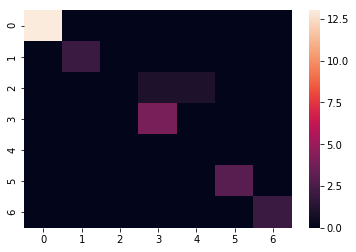

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred))

`precision_recall_fscore_support` [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

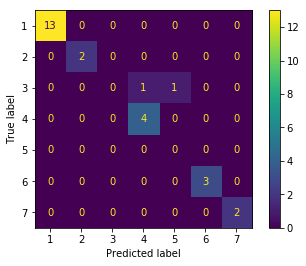

In [20]:
plot_confusion_matrix(model, X_test, y_test)

### Example only:
<img src='http://rasbt.github.io/mlxtend/user_guide/evaluate/lift_score_files/lift_cm_1.png'>

You can usually, ignore the warnings, but it is a good idea to read them.

In [21]:
target_names

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [22]:
df_metrics = pd.DataFrame(
    dict(
        zip('Precision Recall F_score Support'.split(),
            precision_recall_fscore_support(y_test, y_pred)
           )
    ),
    index=target_names
)

df_metrics

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Precision,Recall,F_score,Support
Mammal,1.0,1.0,1.000000,13
Bird,1.0,1.0,1.000000,2
Reptile,0.0,0.0,0.000000,2
Fish,0.8,1.0,0.888889,4
Amphibian,0.0,0.0,0.000000,0
Bug,1.0,1.0,1.000000,3
Invertebrate,1.0,1.0,1.000000,2


`classification_report` [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

You can usually, ignore the warnings, but it is a good idea to read them.

In [23]:
#classification_report(y_test, y_pred, target_names=target_names)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        13
        Bird       1.00      1.00      1.00         2
     Reptile       0.00      0.00      0.00         2
        Fish       0.80      1.00      0.89         4
   Amphibian       0.00      0.00      0.00         0
         Bug       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         2

    accuracy                           0.92        26
   macro avg       0.69      0.71      0.70        26
weighted avg       0.89      0.92      0.91        26



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

In [24]:
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9230769230769231


## Write metrics to csv

In [25]:
#put imports in the first cell instead
from pathlib import Path
from datetime import datetime

In [32]:
dataPath = Path('./data')
dateFormat = "%Y-%m-%d_%H-%M-%S"
df_metrics.to_csv(dataPath / f'_model_metrics_{datetime.now().strftime(dateFormat)}.csv')

#this would be a problem
#df_metrics.reset_index().to_csv(dataPath / f'_model_metrics_{datetime.now().strftime(dateFormat)}.csv')

#this is fine again
#df_metrics.reset_index().to_csv(dataPath / f'_model_metrics_{datetime.now().strftime(dateFormat)}.csv', index=False)
!ls data

_model_metrics_2020-06-19_04-21-46.csv zoo.csv
class.csv
